In [109]:

import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
from cftime import datetime 
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
jet = mcm.get_cmap('jet')
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import datetime
from datetime import datetime, date, timedelta
from dateutil import tz
import pytz
import time
from time import process_time
%matplotlib inline 

/tmp/ipykernel_2921291/1105253605.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = mcm.get_cmap('jet')


# Set f10.7, f107a, kp, ap

In [2]:
#sample file - want to create files with similar structure for my SMin and SMax data

dss = xr.open_dataset('Nc_Files/spectral_files/wa_avg_c20170519.nc')
dss

<xarray.Dataset>
Dimensions:  (time: 2)
Dimensions without coordinates: time
Data variables:
    date     (time) int32 ...
    f107     (time) float32 ...
    f107a    (time) float32 ...
    kp       (time) float32 ...
    ap       (time) int16 ...
    isn      (time) int16 ...
Attributes:
    Title:                     Average solar activity conditions
    source:                    www.sec.noa.gov
    creation_date:             May 19, 2017
    creator:                   Dan Marsh, NCAR
    history:                   Tue May 23 11:37:20 2017: ncap2 -O -s where (d...
    NCO:                       "4.6.2"
    nco_openmp_thread_number:  1

In [4]:
#Solar Min Paramerters - create NC file

ds_smin = xr.Dataset()

# Copy dimensions
for dim, size in dss.dims.items():
    ds_smin[dim] = xr.DataArray(np.arange(size), dims=dim)


# Iterate through variables and set new values
for var in dss.data_vars:
    # Set new values for each variable (replace with your own values)
    if var == 'date':
        ds_smin[var] = xr.DataArray([18000101, 22000101], dims='time', attrs=dss[var].attrs)
    elif var == 'f107':
        ds_smin[var] = xr.DataArray([70, 70], dims='time', attrs=dss[var].attrs)
    elif var == 'f107a':
        ds_smin[var] = xr.DataArray([70, 70], dims='time', attrs=dss[var].attrs)
    elif var == 'kp':
        ds_smin[var] = xr.DataArray([0.3, 0.3], dims='time', attrs=dss[var].attrs)
    elif var == 'ap':
        ds_smin[var] = xr.DataArray([1.8, 1.8], dims='time', attrs=dss[var].attrs)
    elif var == 'isn':
        ds_smin[var] = xr.DataArray([0, 0], dims='time', attrs=dss[var].attrs)

ds_smin.attrs['title'] = 'Solar Minimum Parameters'
ds_smin.attrs['creator'] = 'Tasha Aylett n.m.aylett@leeds.ac.uk'
ds_smin.attrs['creation_date'] = '20240125'

# Save the new dataset to a NetCDF file
ds_smin.to_netcdf('Nc_Files/spectral_files/Smin_params.nc')

# Print the new dataset
ds_smin

<xarray.Dataset>
Dimensions:  (time: 2)
Coordinates:
  * time     (time) int64 0 1
Data variables:
    date     (time) int64 18000101 22000101
    f107     (time) int64 70 70
    f107a    (time) int64 70 70
    kp       (time) float64 0.3 0.3
    ap       (time) float64 1.8 1.8
    isn      (time) int64 0 0
Attributes:
    title:          Solar Minimum Parameters
    creator:        Tasha Aylett n.m.aylett@leeds.ac.uk
    creation_date:  20240125

In [5]:
#Solar Max Paramerters - create NC file

ds_new = xr.Dataset()

# Copy dimensions
for dim, size in dss.dims.items():
    ds_new[dim] = xr.DataArray(np.arange(size), dims=dim)


# Iterate through variables and set new values
for var in dss.data_vars:
    # Set new values for each variable (replace with your own values)
    if var == 'date':
        ds_new[var] = xr.DataArray([18000101, 22000101], dims='time', attrs=dss[var].attrs)
    elif var == 'f107':
        ds_new[var] = xr.DataArray([200, 200], dims='time', attrs=dss[var].attrs)
    elif var == 'f107a':
        ds_new[var] = xr.DataArray([200, 200], dims='time', attrs=dss[var].attrs)
    elif var == 'kp':
        ds_new[var] = xr.DataArray([3.0, 3.0], dims='time', attrs=dss[var].attrs)
    elif var == 'ap':
        ds_new[var] = xr.DataArray([15, 15], dims='time', attrs=dss[var].attrs)
    elif var == 'isn':
        ds_new[var] = xr.DataArray([0, 0], dims='time', attrs=dss[var].attrs)


ds_new.attrs['title'] = 'Solar Maximum Parameters'
ds_new.attrs['creator'] = 'Tasha Aylett n.m.aylett@leeds.ac.uk'
ds_new.attrs['creation_date'] = '20240125'

# Save the new dataset to a NetCDF file
ds_smin.to_netcdf('Nc_Files/spectral_files/Smax_params.nc')

# Print the new dataset
ds_new

<xarray.Dataset>
Dimensions:  (time: 2)
Coordinates:
  * time     (time) int64 0 1
Data variables:
    date     (time) int64 18000101 22000101
    f107     (time) int64 200 200
    f107a    (time) int64 200 200
    kp       (time) float64 3.0 3.0
    ap       (time) int64 15 15
    isn      (time) int64 0 0
Attributes:
    title:          Solar Maximum Parameters
    creator:        Tasha Aylett n.m.aylett@leeds.ac.uk
    creation_date:  20240125

# tsi

In [110]:
nc_sol_irrad = 'Nc_Files/arc4/spectral_irradiance_Lean_1950-2014_daily_GOME-Mg_Leap_c150623.nc'
ds_sol_irrad = xr.open_dataset(nc_sol_irrad, decode_times=False)
ds_sol_irrad

<xarray.Dataset>
Dimensions:         (wavelength: 3780, time: 23741, ref_time_bound: 2)
Coordinates:
  * ref_time_bound  (ref_time_bound) float64 6.696e+05 6.816e+05
  * wavelength      (wavelength) float64 120.5 121.5 ... 9.992e+04 9.998e+04
Dimensions without coordinates: time
Data variables:
    band_width      (wavelength) float64 ...
    date            (time) float64 ...
    ssi             (time, wavelength) float64 ...
    ssi_ref         (wavelength) float64 ...
    tsi             (time) float64 ...
    tsi_ref         float64 ...
Attributes:
    notes:                     \nData derived by Judith Lean, jlean@ssd5.nrl....
    scaling:                   \nAbsolute spectral and total irradiance inclu...
    history:                   Tue Jun 23 12:37:10 2015: ncrcat spectral_irra...
    Source_data:               \nhttp://www.geo.fu-berlin.de/en/met/ag/strat/...
    Source_website:            \nhttp://www.geo.fu-berlin.de/en/met/ag/strat/...
    title:                     \nLean daily solar irradiance for 19500101-201...
    creator:                   \nMike Mills, mmills@ucar.edu
    creation_date:             \nWed Feb 27 14:56:27 MST 2013
    nco_openmp_thread_number:  1
    NCO:                       4.4.2

In [102]:
ref_time_bound = ds_sol_irrad['ref_time_bound']
value_0 = ref_time_bound[0].values #669591
value_1 = ref_time_bound[1].values #681636

# Convert values to datetime using cftime
datetime_0 = cftime.num2date(value_0, 'days since 0000-01-01 00:00:00', 'proleptic_gregorian')
datetime_1 = cftime.num2date(value_1, 'days since 0000-01-01 00:00:00', 'proleptic_gregorian')

print("Value 0:", datetime_0.strftime('%Y-%m-%d %H:%M:%S'))
print("Value 1:", datetime_1.strftime('%Y-%m-%d %H:%M:%S'))

Value 0: 1833-04-12 00:00:00
Value 1: 1866-04-04 00:00:00


In [4]:
#81 days spanning before/after Solar Min or Max dates listed on Wikipedia for solar cycles 1950 - 2014 https://en.wikipedia.org/wiki/List_of_solar_cycles

#Solar cycle 19
#Min 1954-04
date_ind_min19 = 1551
date_ind_st_min19 = date_ind_min19 -40
date_ind_fin_min19 = date_ind_min19 +41
#Max 1958-03
date_ind_max19 = 2981
date_ind_st_max19 = date_ind_max19 -40
date_ind_fin_max19 = date_ind_max19 +41


#Solar cycle 20
#Min 1964-10
date_ind_min20 = 5387
date_ind_st_min20 = date_ind_min20 -40
date_ind_fin_min20 = date_ind_min20 +41
#Max 1968-11
date_ind_max20 = 6879
date_ind_st_max20 = date_ind_max20 -40
date_ind_fin_max20 = date_ind_max20 +41


#Solar cycle 21
#Min 1976-03
date_ind_min21 = 9556
date_ind_st_min21 = date_ind_min21 -40
date_ind_fin_min21 = date_ind_min21 +41
#Max 1979-12
date_ind_max21 = 10926
date_ind_st_max21 = date_ind_max21 -40
date_ind_fin_max21 = date_ind_max21 +41


#Solar cycle 22
#Min 1986-09
date_ind_min22 = 13392
date_ind_st_min22 = date_ind_min22 -40
date_ind_fin_min22 = date_ind_min22 +41
#Max 1989-11
date_ind_max22 = 14549
date_ind_st_max22 = date_ind_max22 -40
date_ind_fin_max22 = date_ind_max22 +41


#Solar cycle 23
#Min 1996-08
date_ind_min23 = 17014
date_ind_st_min23 = date_ind_min23 -40
date_ind_fin_min23 = date_ind_min23 +41
#Max 2001-11
date_ind_max23 = 18932
date_ind_st_max23 = date_ind_max23 -40
date_ind_fin_max23 = date_ind_max23 +41


#Solar cycle 24
#Min 2008-12
date_ind_min24 = 21519 #2008-12-01
date_ind_st_min24 = date_ind_min24 -40
date_ind_fin_min24 = date_ind_min24 +41
#Max 2014-04
date_ind_max24 = 23466
date_ind_st_max24 = date_ind_max24 -40
date_ind_fin_max24 = date_ind_max24 +41

In [6]:
tsi = ds_sol_irrad['tsi']

date = ds_sol_irrad['date'] #1950-01-01 -> 2014-12-31   x23741
times = np.arange(datetime(1950,1,1), datetime(2014,12,31) + timedelta(days=1), timedelta(days=1)).astype(datetime)


tsi_min19 = tsi[date_ind_st_min19:date_ind_fin_min19]
tsi_min20 = tsi[date_ind_st_min20:date_ind_fin_min20]
tsi_min21 = tsi[date_ind_st_min21:date_ind_fin_min21]
tsi_min22 = tsi[date_ind_st_min22:date_ind_fin_min22]
tsi_min23 = tsi[date_ind_st_min23:date_ind_fin_min23]
tsi_min24 = tsi[date_ind_st_min24:date_ind_fin_min24]

tsi_max19 = tsi[date_ind_st_max19:date_ind_fin_max19]
tsi_max20 = tsi[date_ind_st_max20:date_ind_fin_max20]
tsi_max21 = tsi[date_ind_st_max21:date_ind_fin_max21]
tsi_max22 = tsi[date_ind_st_max22:date_ind_fin_max22]
tsi_max23 = tsi[date_ind_st_max23:date_ind_fin_max23]
tsi_max24 = tsi[date_ind_st_max24:date_ind_fin_max24]

time = np.arange(0,len(tsi_min19))

mean_tsi_min19 = np.mean(tsi_min19, axis=0)
mean_tsi_min20 = np.mean(tsi_min20, axis=0)
mean_tsi_min21 = np.mean(tsi_min21, axis=0)
mean_tsi_min22 = np.mean(tsi_min22, axis=0)
mean_tsi_min23 = np.mean(tsi_min23, axis=0)
mean_tsi_min24 = np.mean(tsi_min24, axis=0)

mean_tsi_max19 = np.mean(tsi_max19, axis=0)
mean_tsi_max20 = np.mean(tsi_max20, axis=0)
mean_tsi_max21 = np.mean(tsi_max21, axis=0)
mean_tsi_max22 = np.mean(tsi_max22, axis=0)
mean_tsi_max23 = np.mean(tsi_max23, axis=0)
mean_tsi_max24 = np.mean(tsi_max24, axis=0)

min_tsi = np.mean([tsi_min19, tsi_min20, tsi_min21, tsi_min22, tsi_min23, tsi_min24], axis=0)
max_tsi = np.mean([tsi_max19, tsi_max20, tsi_max21, tsi_max22, tsi_max23, tsi_max24], axis=0)


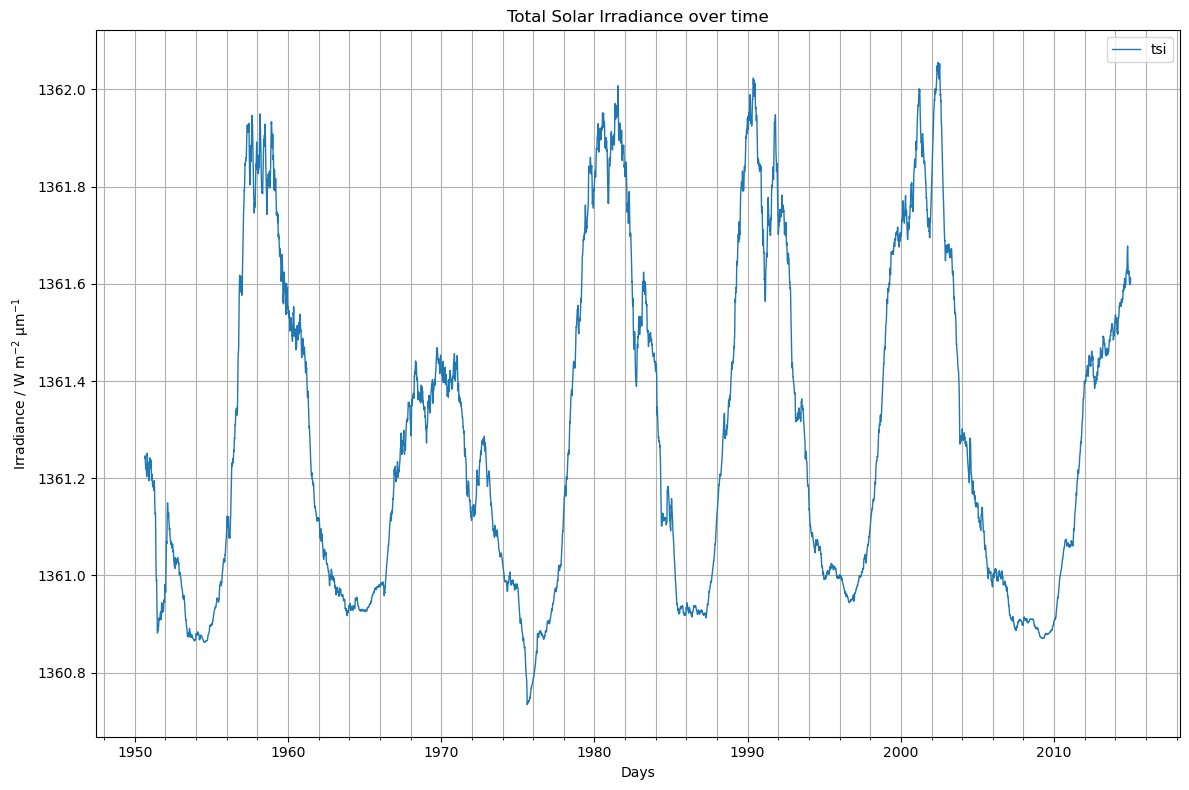

In [108]:
import matplotlib.dates as mdates

window_size = 81*3
tsi_rollmean = np.convolve(tsi, np.ones(window_size)/window_size, mode='valid')
adjusted_times = times[window_size-1:len(tsi_rollmean) + window_size-1]


fig, ax = plt.subplots(figsize=(12, 8))
A = ax.plot(adjusted_times, tsi_rollmean, label='tsi', linewidth=1.0 )

ax.set_ylabel('Irradiance / W m$^{-2}$ \u03BCm$^{-1}$')
ax.set_xlabel('Days')
ax.set_title('Total Solar Irradiance over time')
ax.legend()
ax.grid(True, which='both')
# Set explicit major ticks with an interval of 5 years for datetime format
ax.xaxis.set_major_locator(mdates.YearLocator(10))
ax.xaxis.set_minor_locator(mdates.YearLocator(2))
plt.tight_layout()


#Solar cycle 19 #Min 1954-04 #Max 1958-03
#Solar cycle 20 #Min 1964-10 #Max 1968-11
#Solar cycle 21 #**Min 1976-03** #Max 1979-12
#Solar cycle 22 #Min 1986-09 **#Max 1989-11**
#Solar cycle 23 #Min 1996-08 #Max 2001-11
#Solar cycle 24 #Min 2008-12 #Max 2014-04


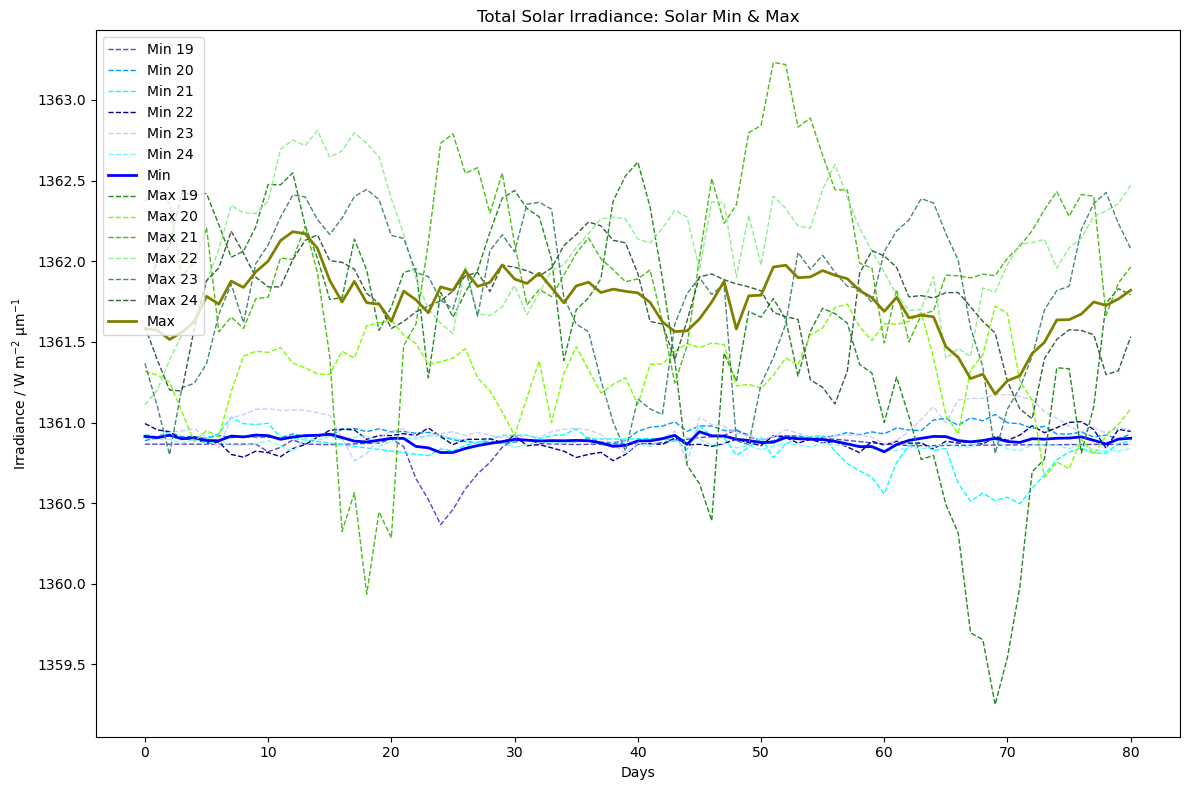

In [10]:

fig, ax = plt.subplots(figsize=(12, 8))


A = ax.plot(time, tsi_min19, linestyle='dashed', color='#5D3FD3', label='Min 19', linewidth=1.0 )
B = ax.plot(time, tsi_min20, linestyle='dashed', color='#0096FF', label='Min 20', linewidth=1.0 )
C = ax.plot(time, tsi_min21, linestyle='dashed', color='#00FFFF', label='Min 21', linewidth=1.0 )
D = ax.plot(time, tsi_min22, linestyle='dashed', color='#00008B', label='Min 22', linewidth=1.0 )
E = ax.plot(time, tsi_min23, linestyle='dashed', color='#CCCCFF', label='Min 23', linewidth=1.0 )
F = ax.plot(time, tsi_min24, linestyle='dashed', color='#7DF9FF', label='Min 24', linewidth=1.0 )

G = ax.plot(time, min_tsi, label='Min', color='#0000FF', linewidth=2.0 )


Aa = ax.plot(time, tsi_max19, linestyle='dashed', color='#228B22', label='Max 19', linewidth=1.0 )
Bb = ax.plot(time, tsi_max20, linestyle='dashed', color='#7CFC00', label='Max 20', linewidth=1.0 )
Cc = ax.plot(time, tsi_max21, linestyle='dashed', color='#4CBB17', label='Max 21', linewidth=1.0 )
Dd = ax.plot(time, tsi_max22, linestyle='dashed', color='#90EE90', label='Max 22', linewidth=1.0 )
Ee = ax.plot(time, tsi_max23, linestyle='dashed', color='#478778', label='Max 23', linewidth=1.0 )
Ff = ax.plot(time, tsi_max24, linestyle='dashed', color='#355E3B', label='Max 24', linewidth=1.0 )

Gg = ax.plot(time, max_tsi, label='Max', color='#808000', linewidth=2.0 )


ax.set_ylabel('Irradiance / W m$^{-2}$ \u03BCm$^{-1}$')
ax.set_xlabel('Days')
ax.set_title('Total Solar Irradiance: Solar Min & Max')
ax.legend()
plt.tight_layout()


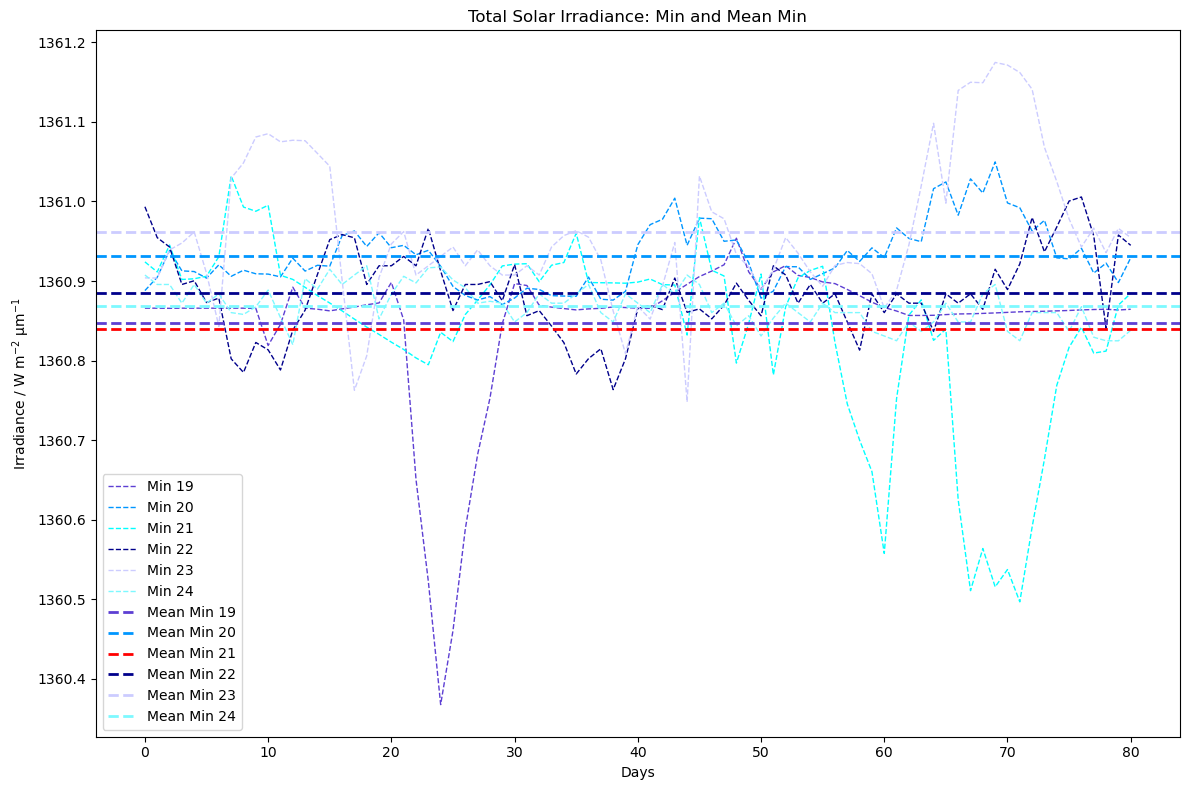

In [11]:
# Solar Min

fig, ax = plt.subplots(figsize=(12, 8))

# Plot individual lines
A = ax.plot(time, tsi_min19, linestyle='dashed', color='#5D3FD3', label='Min 19', linewidth=1.0)
B = ax.plot(time, tsi_min20, linestyle='dashed', color='#0096FF', label='Min 20', linewidth=1.0)
C = ax.plot(time, tsi_min21, linestyle='dashed', color='#00FFFF', label='Min 21', linewidth=1.0)
D = ax.plot(time, tsi_min22, linestyle='dashed', color='#00008B', label='Min 22', linewidth=1.0)
E = ax.plot(time, tsi_min23, linestyle='dashed', color='#CCCCFF', label='Min 23', linewidth=1.0)
F = ax.plot(time, tsi_min24, linestyle='dashed', color='#7DF9FF', label='Min 24', linewidth=1.0)

# Plot mean lines
G = ax.axhline(y=np.mean(mean_tsi_min19), color='#5D3FD3', linestyle='dashed', label='Mean Min 19', linewidth=2.0)
H = ax.axhline(y=np.mean(mean_tsi_min20), color='#0096FF', linestyle='dashed', label='Mean Min 20', linewidth=2.0)
I = ax.axhline(y=np.mean(mean_tsi_min21), color='RED', linestyle='dashed', label='Mean Min 21', linewidth=2.0)
J = ax.axhline(y=np.mean(mean_tsi_min22), color='#00008B', linestyle='dashed', label='Mean Min 22', linewidth=2.0)
K = ax.axhline(y=np.mean(mean_tsi_min23), color='#CCCCFF', linestyle='dashed', label='Mean Min 23', linewidth=2.0)
L = ax.axhline(y=np.mean(mean_tsi_min24), color='#7DF9FF', linestyle='dashed', label='Mean Min 24', linewidth=2.0)

ax.set_ylabel('Irradiance / W m$^{-2}$ \u03BCm$^{-1}$')
ax.set_xlabel('Days')
ax.set_title('Total Solar Irradiance: Min and Mean Min')
ax.legend()
plt.tight_layout()


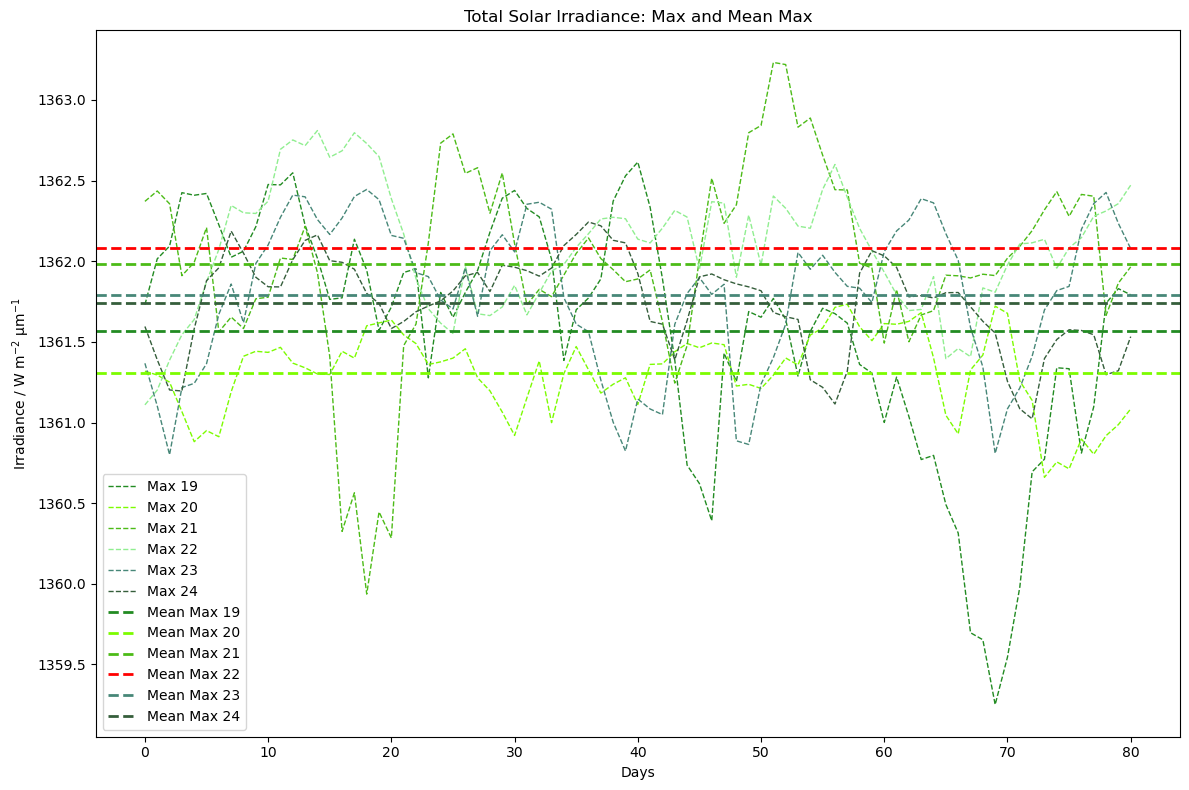

In [13]:
# Solar Max

fig, ax = plt.subplots(figsize=(12, 8))

# Plot individual lines
A = ax.plot(time, tsi_max19, linestyle='dashed', color='#228B22', label='Max 19', linewidth=1.0)
B = ax.plot(time, tsi_max20, linestyle='dashed', color='#7CFC00', label='Max 20', linewidth=1.0)
C = ax.plot(time, tsi_max21, linestyle='dashed', color='#4CBB17', label='Max 21', linewidth=1.0)
D = ax.plot(time, tsi_max22, linestyle='dashed', color='#90EE90', label='Max 22', linewidth=1.0)
E = ax.plot(time, tsi_max23, linestyle='dashed', color='#478778', label='Max 23', linewidth=1.0)
F = ax.plot(time, tsi_max24, linestyle='dashed', color='#355E3B', label='Max 24', linewidth=1.0)

# Plot mean lines
G = ax.axhline(y=np.mean(mean_tsi_max19), color='#228B22', linestyle='dashed', label='Mean Max 19', linewidth=2.0)
H = ax.axhline(y=np.mean(mean_tsi_max20), color='#7CFC00', linestyle='dashed', label='Mean Max 20', linewidth=2.0)
I = ax.axhline(y=np.mean(mean_tsi_max21), color='#4CBB17', linestyle='dashed', label='Mean Max 21', linewidth=2.0)
J = ax.axhline(y=np.mean(mean_tsi_max22), color='RED', linestyle='dashed', label='Mean Max 22', linewidth=2.0)
K = ax.axhline(y=np.mean(mean_tsi_max23), color='#478778', linestyle='dashed', label='Mean Max 23', linewidth=2.0)
L = ax.axhline(y=np.mean(mean_tsi_max24), color='#355E3B', linestyle='dashed', label='Mean Max 24', linewidth=2.0)

ax.set_ylabel('Irradiance / W m$^{-2}$ \u03BCm$^{-1}$')
ax.set_xlabel('Days')
ax.set_title('Total Solar Irradiance: Max and Mean Max')
ax.legend()
plt.tight_layout()


In [65]:
# Solar Min
# Solar Cycle 21 is lowest irradiance

mean_tsi_min21.item() # = 1360.83910467   W m-2 Cm-1


1360.839104674074

In [66]:
# Solar Max
# Solar Cycle 22 is highest irradiance

mean_tsi_max22.item()  # = 1362.08482686   W m-2 Cm-1

1362.0848268635802

# ssi

In [73]:
ssi = ds_sol_irrad['ssi']
wavelength = ds_sol_irrad['wavelength']

ssi_min19 = ssi[date_ind_min19,:]
ssi_min20 = ssi[date_ind_min20,:]
ssi_min21 = ssi[date_ind_min21,:]
ssi_min22 = ssi[date_ind_min22,:]
ssi_min23 = ssi[date_ind_min23,:]
ssi_min24 = ssi[date_ind_min24,:]

ssi_max19 = ssi[date_ind_max19,:]
ssi_max20 = ssi[date_ind_max20,:]
ssi_max21 = ssi[date_ind_max21,:]
ssi_max22 = ssi[date_ind_max22,:]
ssi_max23 = ssi[date_ind_max23,:]
ssi_max24 = ssi[date_ind_max24,:]

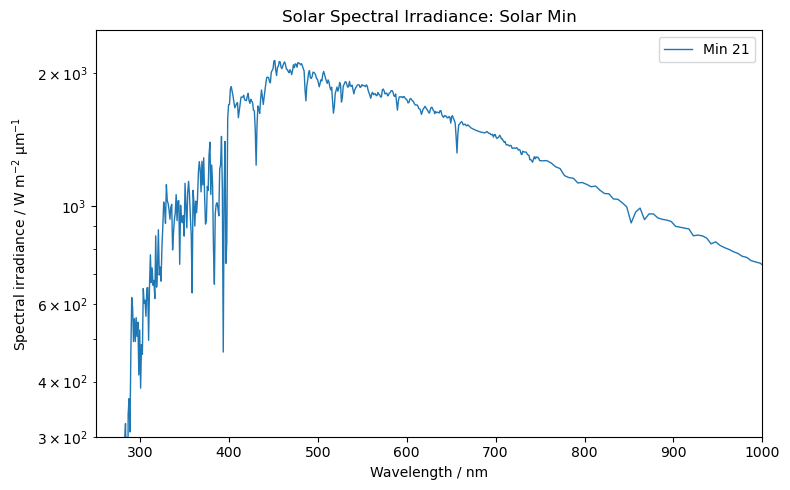

In [74]:
# Solar Min

fig, ax = plt.subplots(figsize=(8, 5))

# A = ax.plot(wavelength, ssi_min19, label='Min 19', linewidth=1.0 )
# B = ax.plot(wavelength, ssi_min20, label='Min 20', linewidth=1.0 )
C = ax.plot(wavelength, ssi_min21, label='Min 21', linewidth=1.0 )
# D = ax.plot(wavelength, ssi_min22, label='Min 22', linewidth=1.0 )
# E = ax.plot(wavelength, ssi_min23, label='Min 23', linewidth=1.0 )
# F = ax.plot(wavelength, ssi_min24, label='Min 24', linewidth=1.0 )

ax.set_yscale('log')
ax.set_ylabel('Spectral irradiance / W m$^{-2}$ \u03BCm$^{-1}$')
ax.set_ylim(300,2500)
ax.set_xlim(250,1000)
ax.set_xlabel('Wavelength / nm')
ax.set_title('Solar Spectral Irradiance: Solar Min')
ax.legend()
plt.tight_layout()

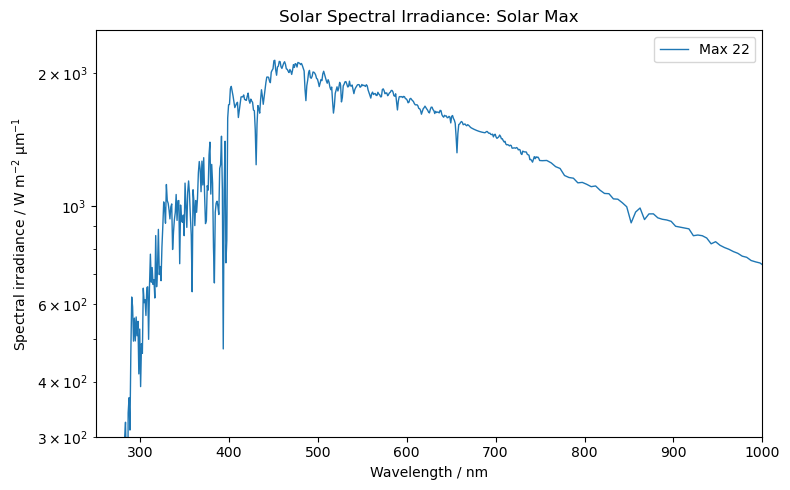

In [75]:
# Solar Max

fig, ax = plt.subplots(figsize=(8, 5))

# Aa = ax.plot(wavelength, ssi_max19, label='Max 19', linewidth=1.0 )
# Bb = ax.plot(wavelength, ssi_max20, label='Max 20', linewidth=1.0 )
# Cc = ax.plot(wavelength, ssi_max21, label='Max 21', linewidth=1.0 )
Dd = ax.plot(wavelength, ssi_max22, label='Max 22', linewidth=1.0 )
# Ee = ax.plot(wavelength, ssi_max23, label='Max 23', linewidth=1.0 )
# Ff = ax.plot(wavelength, ssi_max24, label='Max 24', linewidth=1.0 )

# Gg = ax.plot(wavelength, max_ssi, label='Max', color='g',  linewidth=1.0 )

ax.set_yscale('log')
ax.set_ylabel('Spectral irradiance / W m$^{-2}$ \u03BCm$^{-1}$')
ax.set_ylim(300,2500)
ax.set_xlim(250,1000)
ax.set_xlabel('Wavelength / nm')
ax.set_title('Solar Spectral Irradiance: Solar Max')
ax.legend()
plt.tight_layout()

# Create new ssi & tsi NC file

In [106]:
# Solar Min

ssi_min21_exp = xr.concat([ssi_min21] * 2, dim='time')


new_ds_smin = xr.Dataset()

new_ds_smin['wavelength'] = xr.DataArray(ds_sol_irrad['wavelength'], dims='wavelength', attrs=ds_sol_irrad['wavelength'].attrs)
new_ds_smin['ref_time_bound'] = xr.DataArray(ds_sol_irrad['ref_time_bound'], dims='ref_time_bound', attrs=ds_sol_irrad['ref_time_bound'].attrs)

new_ds_smin['date'] = xr.DataArray([18000101, 22000101], dims='time', attrs=ds_sol_irrad['date'].attrs)
new_ds_smin['band_width'] = xr.DataArray(ds_sol_irrad['band_width'], dims='wavelength', attrs=ds_sol_irrad['band_width'].attrs)

new_ds_smin['ssi'] = xr.DataArray(ssi_min21_exp, dims=('time', 'wavelength'), attrs=ds_sol_irrad['ssi'].attrs)
new_ds_smin['ssi_ref'] = xr.DataArray(ds_sol_irrad['ssi_ref'], dims='wavelength', attrs=ds_sol_irrad['ssi_ref'].attrs)

new_ds_smin['tsi'] = xr.DataArray([mean_tsi_min21.item(),mean_tsi_min21.item()], dims='time', attrs=ds_sol_irrad['tsi'].attrs)
new_ds_smin['tsi_ref'] = xr.DataArray(ds_sol_irrad['tsi_ref'], attrs=ds_sol_irrad['tsi_ref'].attrs)


new_ds_smin.attrs['notes from prev file'] = '''Data derived by Judith Lean, jlean@ssd5.nrl.navy.mil
Total and spectral irradiance variations are determined independently of each other,
with more uncertainty in the spectral irradiance changes which are determined in 1 
nm bins.  Integrated SSI is therefore varies slightly from TSI.
Reference spectral and total irradiances derived from average over years 1834-1867 (solar
cycles 8-10) using annual average data (spectral_irradiance_Lean_1610-2140_ann_c100405.nc)'''

new_ds_smin.attrs['author'] = 'Tasha Aylett n.m.aylett@leeds.ac.uk'

new_ds_smin.attrs['Further Notes'] = '''
Data derived from file: spectral_irradiance_Lean_1950-2014_daily_GOME-Mg_Leap_c150623.nc, Mike Mills, mmills@ucar.edu

tsi is an 81 day average (3 solar rotations) around the solar min for cycle 21 (1976-03-01)
ssi is the ssi spectrum from 1976-03-01

Data repeated over two dates, 18000101 and 22000101

ssi_ref and tsi_ref are same as in prev file
'''

new_ds_smin.to_netcdf('Nc_Files/spectral_files/Smin_spectral_irradiance_cycle21.nc')

new_ds_smin

<xarray.Dataset>
Dimensions:         (wavelength: 3780, ref_time_bound: 2, time: 2)
Coordinates:
  * wavelength      (wavelength) float64 120.5 121.5 ... 9.992e+04 9.998e+04
  * ref_time_bound  (ref_time_bound) float64 6.696e+05 6.816e+05
Dimensions without coordinates: time
Data variables:
    date            (time) int64 18000101 22000101
    band_width      (wavelength) float64 1.0 1.0 1.0 1.0 ... 50.0 50.0 50.0 50.0
    ssi             (time, wavelength) float64 0.1317 5.586 ... 2.654e-05
    ssi_ref         (wavelength) float64 0.1392 5.836 ... 2.66e-05 2.655e-05
    tsi             (time) float64 1.361e+03 1.361e+03
    tsi_ref         float64 1.361e+03
Attributes:
    notes from prev file:  Data derived by Judith Lean, jlean@ssd5.nrl.navy.m...
    author:                Tasha Aylett n.m.aylett@leeds.ac.uk
    Further Notes:         \nData derived from file: spectral_irradiance_Lean...

In [107]:
# Solar Max

ssi_max22_exp = xr.concat([ssi_max22] * 2, dim='time')


new_ds_smax = xr.Dataset()

new_ds_smax['wavelength'] = xr.DataArray(ds_sol_irrad['wavelength'], dims='wavelength', attrs=ds_sol_irrad['wavelength'].attrs)
new_ds_smax['ref_time_bound'] = xr.DataArray(ds_sol_irrad['ref_time_bound'], dims='ref_time_bound', attrs=ds_sol_irrad['ref_time_bound'].attrs)

new_ds_smax['date'] = xr.DataArray([18000101, 22000101], dims='time', attrs=ds_sol_irrad['date'].attrs)
new_ds_smax['band_width'] = xr.DataArray(ds_sol_irrad['band_width'], dims='wavelength', attrs=ds_sol_irrad['band_width'].attrs)

new_ds_smax['ssi'] = xr.DataArray(ssi_max22_exp, dims=('time', 'wavelength'), attrs=ds_sol_irrad['ssi'].attrs)
new_ds_smax['ssi_ref'] = xr.DataArray(ds_sol_irrad['ssi_ref'], dims='wavelength', attrs=ds_sol_irrad['ssi_ref'].attrs)

new_ds_smax['tsi'] = xr.DataArray([mean_tsi_max22.item(),mean_tsi_max22.item()], dims='time', attrs=ds_sol_irrad['tsi'].attrs)
new_ds_smax['tsi_ref'] = xr.DataArray(ds_sol_irrad['tsi_ref'], attrs=ds_sol_irrad['tsi_ref'].attrs)


new_ds_smax.attrs['notes from prev file'] = '''Data derived by Judith Lean, jlean@ssd5.nrl.navy.mil
Total and spectral irradiance variations are determined independently of each other,
with more uncertainty in the spectral irradiance changes which are determined in 1 
nm bins.  Integrated SSI is therefore varies slightly from TSI.
Reference spectral and total irradiances derived from average over years 1834-1867 (solar
cycles 8-10) using annual average data (spectral_irradiance_Lean_1610-2140_ann_c100405.nc)'''

new_ds_smax.attrs['author'] = 'Tasha Aylett n.m.aylett@leeds.ac.uk'

new_ds_smax.attrs['Further Notes'] = '''
Data derived from file: spectral_irradiance_Lean_1950-2014_daily_GOME-Mg_Leap_c150623.nc, Mike Mills, mmills@ucar.edu

tsi is an 81 day average (3 solar rotations) around the solar max for cycle 22 (1989-11-01)
ssi is the ssi spectrum from 1989-11-01

Data repeated over two dates, 18000101 and 22000101

ssi_ref and tsi_ref are same as in prev file
'''

new_ds_smax.to_netcdf('Nc_Files/spectral_files/Smax_spectral_irradiance_cycle22.nc')

new_ds_smax

<xarray.Dataset>
Dimensions:         (wavelength: 3780, ref_time_bound: 2, time: 2)
Coordinates:
  * wavelength      (wavelength) float64 120.5 121.5 ... 9.992e+04 9.998e+04
  * ref_time_bound  (ref_time_bound) float64 6.696e+05 6.816e+05
Dimensions without coordinates: time
Data variables:
    date            (time) int64 18000101 22000101
    band_width      (wavelength) float64 1.0 1.0 1.0 1.0 ... 50.0 50.0 50.0 50.0
    ssi             (time, wavelength) float64 0.2077 8.312 ... 2.663e-05
    ssi_ref         (wavelength) float64 0.1392 5.836 ... 2.66e-05 2.655e-05
    tsi             (time) float64 1.362e+03 1.362e+03
    tsi_ref         float64 1.361e+03
Attributes:
    notes from prev file:  Data derived by Judith Lean, jlean@ssd5.nrl.navy.m...
    author:                Tasha Aylett n.m.aylett@leeds.ac.uk
    Further Notes:         \nData derived from file: spectral_irradiance_Lean...

# Old Code - some is functional, don't execute unless correct file is there 

In [2]:
#f107

# The solar radio flux at 10.7 cm (2800 MHz) is an excellent indicator of solar activity. Often called the F10.7 index, 
# it is one of the longest running records of solar activity. The F10.7 radio emissions originates high in the chromosphere 
# and low in the corona of the solar atmosphere. The F10.7 correlates well with the sunspot number as well as a number of 
# UltraViolet (UV) and visible solar irradiance records. The F10.7 has been measured consistently in Canada since 1947, 
# first at Ottawa, Ontario; and then at the Penticton Radio Observatory in British Columbia, Canada. Unlike many solar 
# indices, the F10.7 radio flux can easily be measured reliably on a day-to-day basis from the Earth’s surface, in all 
# types of weather. Reported in “solar flux units”, (s.f.u.), the F10.7 can vary from below 50 s.f.u., to above 
# 300 s.f.u., over the course of a solar cycle.

In [3]:
#===============================================================================================================================
#===============================================================================================================================
#solar max data files
#===============================================================================================================================
#===============================================================================================================================

nc_max = 'Nc_Files/arc4/wa_smax.nc'
ds_max = xr.open_dataset(nc_max, decode_times=False)
ds_max

<xarray.Dataset>
Dimensions:  (time: 2)
Dimensions without coordinates: time
Data variables:
    f107     (time) float32 ...
    f107a    (time) float32 ...
    kp       (time) float32 ...
    ap       (time) int16 ...
    isn      (time) int16 ...
    date     (time) int32 ...
Attributes:
    Title:          Time dependent solar activity conditions
    source:         www.sec.noa.gov
    creation_date:  Aug 16, 2004
    creator:        Dan Marsh, NCAR

In [4]:
f107_max = ds_max.variables['f107']
#array([210., 210.], dtype=float32)
#long_name : #10.7 cm solar radio flux (F10.7)
#units : #10^-22 W m^-2 Hz^-1


f107a_max = ds_max.variables['f107a']
#array([210., 210.], dtype=float32)
#long_name : 81-day centered mean of 10.7 cm solar radio flux (F10.7)

kp_max = ds_max.variables['kp']
#array([4., 4.], dtype=float32)
#long_name : Daily planetary K index

ap_max = ds_max.variables['ap']
#array([27, 27], dtype=int16)
#long_name : Daily planetary a index
#units : nanoTeslas


In [5]:
#===============================================================================================================================
#===============================================================================================================================
#solar min data files
#===============================================================================================================================
#===============================================================================================================================

nc_min = 'Nc_Files/arc4/wa_smin.nc'
ds_min = xr.open_dataset(nc_min, decode_times=False)
ds_min

<xarray.Dataset>
Dimensions:  (time: 2)
Dimensions without coordinates: time
Data variables:
    f107     (time) float32 ...
    f107a    (time) float32 ...
    kp       (time) float32 ...
    ap       (time) int16 ...
    isn      (time) int16 ...
    date     (time) int32 ...
Attributes:
    Title:          Time dependent solar activity conditions
    source:         www.sec.noa.gov
    creation_date:  Aug 16, 2004
    creator:        Dan Marsh, NCAR

In [6]:
f107_min = ds_min.variables['f107']
#array([77.15, 77.15], dtype=float32)
#long_name : 10.7 cm solar radio flux (F10.7)
#units : 10^-22 W m^-2 Hz^-1

f107a_min = ds_min.variables['f107a']
#array([77.15, 77.15], dtype=float32)
#long_name : 81-day centered mean of 10.7 cm solar radio flux (F10.7)

kp_min = ds_min.variables['kp']
#array([2.7, 2.7], dtype=float32)
#long_name : Daily planetary K index

ap_min = ds_min.variables['ap']
#array([12, 12], dtype=int16)
#long_name : Daily planetary a index
#units : nanoTeslas

In [7]:
#===============================================================================================================================
#===============================================================================================================================
#solar_parms_data_file   
#===============================================================================================================================
#===============================================================================================================================

nc_sol_parm = 'Nc_Files/arc4/wa_avg_c20170519.nc'
ds_sol_parm = xr.open_dataset(nc_sol_parm, decode_times=False)

ds_sol_parm

<xarray.Dataset>
Dimensions:  (time: 2)
Dimensions without coordinates: time
Data variables:
    date     (time) int32 ...
    f107     (time) float32 ...
    f107a    (time) float32 ...
    kp       (time) float32 ...
    ap       (time) int16 ...
    isn      (time) int16 ...
Attributes:
    Title:                     Average solar activity conditions
    source:                    www.sec.noa.gov
    creation_date:             May 19, 2017
    creator:                   Dan Marsh, NCAR
    history:                   Tue May 23 11:37:20 2017: ncap2 -O -s where (d...
    NCO:                       "4.6.2"
    nco_openmp_thread_number:  1

In [8]:
f107_sol_parm = ds_sol_parm.variables['f107']
#array([130., 130.], dtype=float32)
#long_name : 10.7 cm solar radio flux (F10.7)
#units : 10^-22 W m^-2 Hz^-1

f107a_sol_parm = ds_sol_parm.variables['f107a']
#array([130., 130.], dtype=float32)
#long_name : 81-day centered mean of 10.7 cm solar radio flux (F10.7)

kp_sol_parm = ds_sol_parm.variables['kp']
#array([1., 1.], dtype=float32)
#long_name : Daily planetary K index

ap_sol_parm = ds_sol_parm.variables['ap']
#array([4, 4], dtype=int16)
#long_name : Daily planetary a index
#units : nanoTeslas

In [70]:
#===============================================================================================================================
#===============================================================================================================================
#solar_irrad_data_file       
#===============================================================================================================================
#===============================================================================================================================


nc_sol_irrad = 'Nc_Files/arc4/spectral_irradiance_Lean_1950-2014_daily_GOME-Mg_Leap_c150623.nc'
ds_sol_irrad = xr.open_dataset(nc_sol_irrad, decode_times=False)
ds_sol_irrad

<xarray.Dataset>
Dimensions:         (wavelength: 3780, time: 23741, ref_time_bound: 2)
Coordinates:
  * ref_time_bound  (ref_time_bound) float64 6.696e+05 6.816e+05
  * wavelength      (wavelength) float64 120.5 121.5 ... 9.992e+04 9.998e+04
Dimensions without coordinates: time
Data variables:
    band_width      (wavelength) float64 ...
    date            (time) float64 ...
    ssi             (time, wavelength) float64 ...
    ssi_ref         (wavelength) float64 ...
    tsi             (time) float64 ...
    tsi_ref         float64 ...
Attributes:
    notes:                     \nData derived by Judith Lean, jlean@ssd5.nrl....
    scaling:                   \nAbsolute spectral and total irradiance inclu...
    history:                   Tue Jun 23 12:37:10 2015: ncrcat spectral_irra...
    Source_data:               \nhttp://www.geo.fu-berlin.de/en/met/ag/strat/...
    Source_website:            \nhttp://www.geo.fu-berlin.de/en/met/ag/strat/...
    title:                     \nLean daily solar irradiance for 19500101-201...
    creator:                   \nMike Mills, mmills@ucar.edu
    creation_date:             \nWed Feb 27 14:56:27 MST 2013
    nco_openmp_thread_number:  1
    NCO:                       4.4.2

In [72]:
ssi = ds_sol_irrad.variables['ssi'] #(23741, 3780)
tsi = ds_sol_irrad.variables['tsi']


wavelength = ds_sol_irrad.variables['wavelength']

date = ds_sol_irrad.variables['date'] #1950-01-01 -> 2014-12-31
#int(date[0].values)

times = np.arange(datetime(1950,1,1), datetime(2014,12,31) + timedelta(days=1), timedelta(days=1)).astype(datetime)

num_elements = len(times)
print("Number of elements:", num_elements) ##Number of elements: 23740
times[-1]


Number of elements: 23741


datetime.datetime(2014, 12, 31, 0, 0)

In [73]:
#Indices for 6 months before/after Solar Min or Max dates listed on Wikipedia for solar cycles 1950 - 2014 https://en.wikipedia.org/wiki/List_of_solar_cycles

#Solar cycle 19
#Min 1954-04
date_ind_min19 = 1551
date_ind_st_min19 = 1368 #(19530930.)
date_ind_fin_min19 = 1733 #(19540930.)
#Max 1958-03
date_ind_max19 = 2981
date_ind_st_max19 = 2798 #(19570830.)
date_ind_fin_max19 = 3163 #(19580830.)


#Solar cycle 20
#Min 1964-10
date_ind_min20 = 5387
date_ind_st_min20 = 5204 #(19640401.)
date_ind_fin_min20 = 5569 #(19650401.)
#Max 1968-11
date_ind_max20 = 6879
date_ind_st_max20 = 6696 #(19680502.)
date_ind_fin_max20 = 7061 #(19690502.)


#Solar cycle 21
#Min 1976-03
date_ind_min21 = 9556
date_ind_st_min21 = 9373 #(19750831.)
date_ind_fin_min21 = 9738 #(19760830.)
#Max 1979-12
date_ind_max21 = 10926
date_ind_st_max21 = 10743 #(19790601.)
date_ind_fin_max21 = 11108 #(19800531.)


#Solar cycle 22
#Min 1986-09
date_ind_min22 = 13392
date_ind_st_min22 = 13209 #(19860302.)
date_ind_fin_min22 = 13574 #(19870302.)
#Max 1989-11
date_ind_max22 = 14549
date_ind_st_max22 = 14366 #(19890502.)
date_ind_fin_max22 = 14731 #(19900502.)


#Solar cycle 23
#Min 1996-08
date_ind_min23 = 17014
date_ind_st_min23 = 16831 #(19960131.)
date_ind_fin_min23 = 17196 #(19970130.)
#Max 2001-11
date_ind_max23 = 18932
date_ind_st_max23 = 18749 #(20010502.)
date_ind_fin_max23 = 19114 #(20020502.)


#Solar cycle 24
#Min 2008-12
date_ind_min24 = 21519 #2008-12-01
date_ind_st_min24 = 21336 #(20080601.)
date_ind_fin_min24 = 21701 #(20090601.)
#Max 2014-04
date_ind_max24 = 23466
date_ind_st_max24 = 23283 #(20130930.)
date_ind_fin_max24 = 23648 #(20140930.)

In [84]:
date[date_ind_min19].values

array(19540401.)

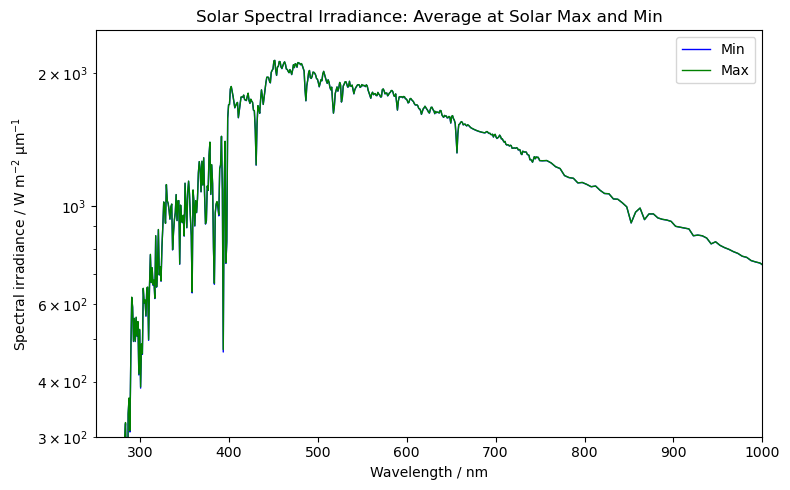

In [82]:
wav_ar = np.arange(0,3780)

min_ssi = np.ndarray(wavelength.shape)
max_ssi = np.ndarray(wavelength.shape)


ssi_min19 = ssi[date_ind_min19,:]
ssi_min20 = ssi[date_ind_min20,:]
ssi_min21 = ssi[date_ind_min21,:]
ssi_min22 = ssi[date_ind_min22,:]
ssi_min23 = ssi[date_ind_min23,:]
ssi_min24 = ssi[date_ind_min24,:]

ssi_max19 = ssi[date_ind_max19,:]
ssi_max20 = ssi[date_ind_max20,:]
ssi_max21 = ssi[date_ind_max21,:]
ssi_max22 = ssi[date_ind_max22,:]
ssi_max23 = ssi[date_ind_max23,:]
ssi_max24 = ssi[date_ind_max24,:]

for iwav in wav_ar:
    min_ssi[iwav] = np.mean( [ ssi_min19[iwav], ssi_min20[iwav], ssi_min21[iwav], ssi_min22[iwav], ssi_min23[iwav], ssi_min24[iwav] ] )
    max_ssi[iwav] = np.mean( [ ssi_max19[iwav], ssi_max20[iwav], ssi_max21[iwav], ssi_max22[iwav], ssi_max23[iwav], ssi_max24[iwav] ] )


#-----------------------------------------------------
#ticks = np.geomspace(1*10**-1, 2*10**3, 30)


fig, ax = plt.subplots(figsize=(8, 5))

# A = ax.plot(wavelength, ssi_min19, linestyle='dashed', label='Min 19', linewidth=1.0 )
# B = ax.plot(wavelength, ssi_min20, linestyle='dashed', label='Min 20', linewidth=1.0 )
# C = ax.plot(wavelength, ssi_min21, linestyle='dashed', label='Min 21', linewidth=1.0 )
# D = ax.plot(wavelength, ssi_min22, linestyle='dashed', label='Min 22', linewidth=1.0 )
# E = ax.plot(wavelength, ssi_min23, linestyle='dashed', label='Min 23', linewidth=1.0 )
# F = ax.plot(wavelength, ssi_min24, linestyle='dashed', label='Min 24', linewidth=1.0 )

G = ax.plot(wavelength, min_ssi, label='Min', color='b', linewidth=1.0 )


# Aa = ax.plot(wavelength, ssi_max19, linestyle='dashed', label='Max 19', linewidth=1.0 )
# Bb = ax.plot(wavelength, ssi_max20, linestyle='dashed', label='Max 20', linewidth=1.0 )
# Cc = ax.plot(wavelength, ssi_max21, linestyle='dashed', label='Max 21', linewidth=1.0 )
# Dd = ax.plot(wavelength, ssi_max22, linestyle='dashed', label='Max 22', linewidth=1.0 )
# Ee = ax.plot(wavelength, ssi_max23, linestyle='dashed', label='Max 23', linewidth=1.0 )
# Ff = ax.plot(wavelength, ssi_max24, linestyle='dashed', label='Max 24', linewidth=1.0 )

Gg = ax.plot(wavelength, max_ssi, label='Max', color='g',  linewidth=1.0 )



ax.set_yscale('log')
ax.set_ylabel('Spectral irradiance / W m$^{-2}$ \u03BCm$^{-1}$')

ax.set_ylim(300,2500)
ax.set_xlim(250,1000)

ax.set_xlabel('Wavelength / nm')

ax.set_title('Solar Spectral Irradiance: Average at Solar Max and Min')

ax.legend()

plt.tight_layout()
#plt.savefig('')
#---------------------------------------------------------------------------------------------------


18262
<xarray.Variable ()>
array(20000101.)
Attributes:
    format:   YYYYMMDD
<xarray.Variable ()>
array(20141231.)
Attributes:
    format:   YYYYMMDD


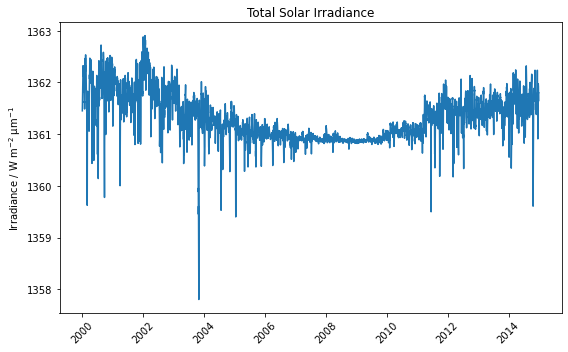

In [13]:
date_plot_ind_min = 18262 #18262=2000-01-01
date_plot_min = date[date_plot_ind_min]
print(str(date_plot_ind_min))
print(str(date_plot_min))

date_plot_ind_max = 23740 #23740=last ind
date_plot_max = date[date_plot_ind_max]
print(str(date_plot_max))

times_plot = times[date_plot_ind_min:date_plot_ind_max]
tsi_plot = tsi[date_plot_ind_min:date_plot_ind_max]

#-----------------------------------------------------
#ticks = np.geomspace(1*10**-1, 2*10**3, 30)


fig, ax = plt.subplots(figsize=(8, 5))


C = ax.plot(times_plot, tsi_plot )

#ax.set_yscale('log')
ax.set_ylabel('Irradiance / W m$^{-2}$ \u03BCm$^{-1}$')

#ax.set_xlim(250,1000)
#ax.set_xlabel('Wavelength / nm')
for label in ax.get_xticklabels():
    label.set_rotation(45) 

ax.set_title('Total Solar Irradiance')

plt.tight_layout()
#plt.savefig('')
#---------------------------------------------------------------------------------------------------


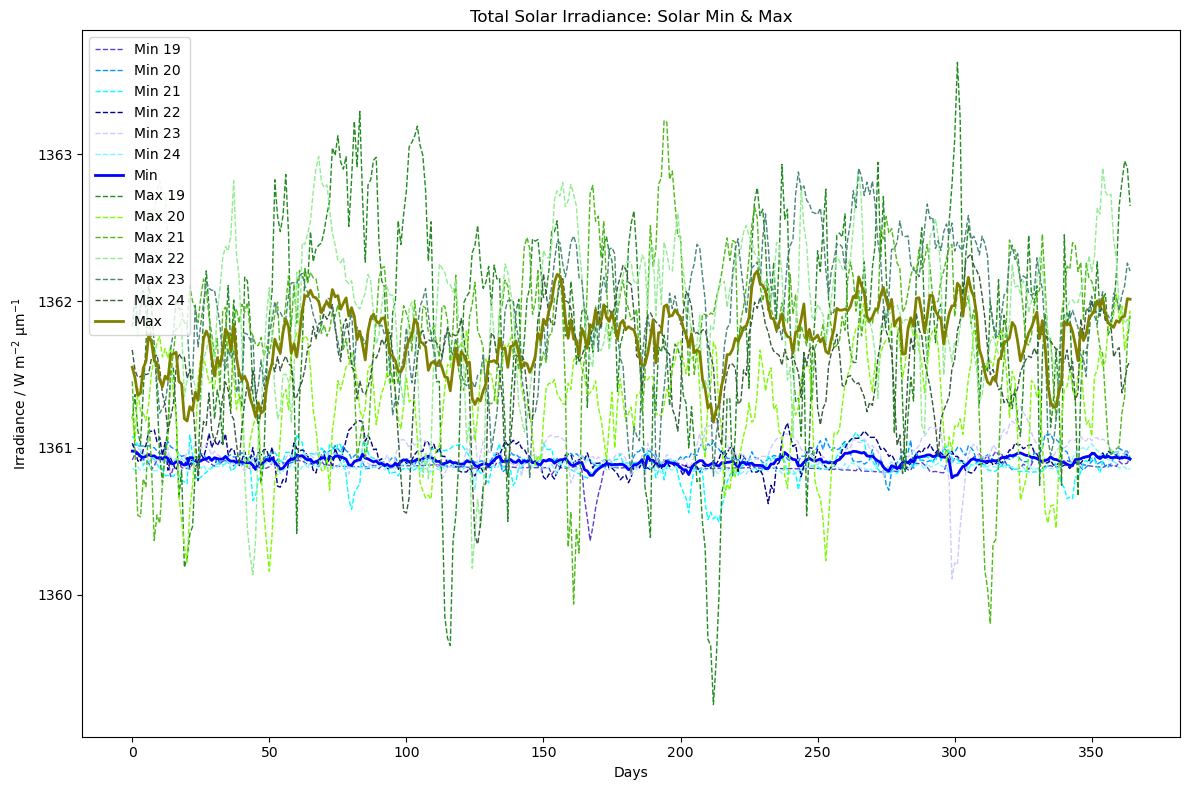

In [88]:
times_yr = np.arange(0,365)
#print(times_yr)

min_tsi = np.ndarray(times_yr.shape)
max_tsi = np.ndarray(times_yr.shape)


tsi_min19 = tsi[date_ind_st_min19:date_ind_fin_min19]
tsi_min20 = tsi[date_ind_st_min20:date_ind_fin_min20]
tsi_min21 = tsi[date_ind_st_min21:date_ind_fin_min21]
tsi_min22 = tsi[date_ind_st_min22:date_ind_fin_min22]
tsi_min23 = tsi[date_ind_st_min23:date_ind_fin_min23]
tsi_min24 = tsi[date_ind_st_min24:date_ind_fin_min24]

tsi_max19 = tsi[date_ind_st_max19:date_ind_fin_max19]
tsi_max20 = tsi[date_ind_st_max20:date_ind_fin_max20]
tsi_max21 = tsi[date_ind_st_max21:date_ind_fin_max21]
tsi_max22 = tsi[date_ind_st_max22:date_ind_fin_max22]
tsi_max23 = tsi[date_ind_st_max23:date_ind_fin_max23]
tsi_max24 = tsi[date_ind_st_max24:date_ind_fin_max24]

for itime in times_yr:
    min_tsi[itime] = np.mean( [tsi_min19[itime],tsi_min20[itime],tsi_min21[itime],tsi_min22[itime],tsi_min23[itime],tsi_min24[itime]] )
    max_tsi[itime] = np.mean( [tsi_max19[itime],tsi_max20[itime],tsi_max21[itime],tsi_max22[itime],tsi_max23[itime],tsi_max24[itime]] )

#-----------------------------------------------------
#ticks = np.geomspace(1*10**-1, 2*10**3, 30)


fig, ax = plt.subplots(figsize=(12, 8))

A = ax.plot(times_yr, tsi_min19, linestyle='dashed', color='#5D3FD3', label='Min 19', linewidth=1.0 )
B = ax.plot(times_yr, tsi_min20, linestyle='dashed', color='#0096FF', label='Min 20', linewidth=1.0 )
C = ax.plot(times_yr, tsi_min21, linestyle='dashed', color='#00FFFF', label='Min 21', linewidth=1.0 )
D = ax.plot(times_yr, tsi_min22, linestyle='dashed', color='#00008B', label='Min 22', linewidth=1.0 )
E = ax.plot(times_yr, tsi_min23, linestyle='dashed', color='#CCCCFF', label='Min 23', linewidth=1.0 )
F = ax.plot(times_yr, tsi_min24, linestyle='dashed', color='#7DF9FF', label='Min 24', linewidth=1.0 )

G = ax.plot(times_yr, min_tsi, label='Min', color='#0000FF', linewidth=2.0 )


Aa = ax.plot(times_yr, tsi_max19, linestyle='dashed', color='#228B22', label='Max 19', linewidth=1.0 )
Bb = ax.plot(times_yr, tsi_max20, linestyle='dashed', color='#7CFC00', label='Max 20', linewidth=1.0 )
Cc = ax.plot(times_yr, tsi_max21, linestyle='dashed', color='#4CBB17', label='Max 21', linewidth=1.0 )
Dd = ax.plot(times_yr, tsi_max22, linestyle='dashed', color='#90EE90', label='Max 22', linewidth=1.0 )
Ee = ax.plot(times_yr, tsi_max23, linestyle='dashed', color='#478778', label='Max 23', linewidth=1.0 )
Ff = ax.plot(times_yr, tsi_max24, linestyle='dashed', color='#355E3B', label='Max 24', linewidth=1.0 )



Gg = ax.plot(times_yr, max_tsi, label='Max', color='#808000', linewidth=2.0 )

#ax.set_yscale('log')
ax.set_ylabel('Irradiance / W m$^{-2}$ \u03BCm$^{-1}$')

#ax.set_xlim(250,1000)
ax.set_xlabel('Days')

ax.set_title('Total Solar Irradiance: Solar Min & Max')

ax.legend()

plt.tight_layout()
#plt.savefig('')
#---------------------------------------------------------------------------------------------------


In [15]:
#===============================================================================================================================
#===============================================================================================================================
#Variable file with f107, kp, ap (etc) values in
#===============================================================================================================================
#===============================================================================================================================

nc_sol_parm_var = 'Nc_Files/arc4/waxsolar_3hr_c170504.nc'
ds_sol_parm_var = xr.open_dataset(nc_sol_parm_var, decode_times=False)

ds_sol_parm_var

<xarray.Dataset>
Dimensions:  (time: 197361)
Dimensions without coordinates: time
Data variables:
    f107     (time) float32 ...
    f107a    (time) float32 ...
    kp       (time) float32 ...
    ap       (time) int16 ...
    isn      (time) int16 ...
    date     (time) int32 ...
    datesec  (time) int32 ...
Attributes:
    Title:          Time dependent solar activity conditions
    source:         www.sec.noa.gov
    creation_date:  December 5, 2016
    creator:        Dan Marsh, NCAR

In [16]:
f107_sol_parm_var = ds_sol_parm_var.variables['f107']
f107a_sol_parm_var = ds_sol_parm_var.variables['f107a']
kp_sol_parm_var = ds_sol_parm_var.variables['kp']
ap_sol_parm_var = ds_sol_parm_var.variables['ap']

date_spv = ds_sol_parm_var.variables['date'] #1947-04-10 -> 2016-07-23
date_spv[0:50]

<xarray.Variable (time: 50)>
array([19470410, 19470410, 19470410, 19470410, 19470410, 19470410, 19470410,
       19470410, 19470411, 19470411, 19470411, 19470411, 19470411, 19470411,
       19470411, 19470411, 19470412, 19470412, 19470412, 19470412, 19470412,
       19470412, 19470412, 19470412, 19470414, 19470414, 19470414, 19470414,
       19470414, 19470414, 19470414, 19470414, 19470417, 19470417, 19470417,
       19470417, 19470417, 19470417, 19470417, 19470417, 19470418, 19470418,
       19470418, 19470418, 19470418, 19470418, 19470418, 19470418, 19470419,
       19470419], dtype=int32)
Attributes:
    long_name:  current date (YYYYMMDD)

In [17]:
#trying to create a new array with relevant datetime values. However this isn't equivalent to the data in the file because 
#there are random days missing from the original xarray dates in the file... Not sure why 

timess = np.arange(datetime(1947,4,10), datetime(2016,7,22), timedelta(hours=3)).astype(datetime)
timess[0:25]

array([datetime.datetime(1947, 4, 10, 0, 0),
       datetime.datetime(1947, 4, 10, 3, 0),
       datetime.datetime(1947, 4, 10, 6, 0),
       datetime.datetime(1947, 4, 10, 9, 0),
       datetime.datetime(1947, 4, 10, 12, 0),
       datetime.datetime(1947, 4, 10, 15, 0),
       datetime.datetime(1947, 4, 10, 18, 0),
       datetime.datetime(1947, 4, 10, 21, 0),
       datetime.datetime(1947, 4, 11, 0, 0),
       datetime.datetime(1947, 4, 11, 3, 0),
       datetime.datetime(1947, 4, 11, 6, 0),
       datetime.datetime(1947, 4, 11, 9, 0),
       datetime.datetime(1947, 4, 11, 12, 0),
       datetime.datetime(1947, 4, 11, 15, 0),
       datetime.datetime(1947, 4, 11, 18, 0),
       datetime.datetime(1947, 4, 11, 21, 0),
       datetime.datetime(1947, 4, 12, 0, 0),
       datetime.datetime(1947, 4, 12, 3, 0),
       datetime.datetime(1947, 4, 12, 6, 0),
       datetime.datetime(1947, 4, 12, 9, 0),
       datetime.datetime(1947, 4, 12, 12, 0),
       datetime.datetime(1947, 4, 12, 15, 0),


In [18]:
#shape mismatch.... because there are random days missing from the original xarray dates in the file... Not sure why 
kp_sol_parm_var.shape #(197361,)
timess.shape #(202448,)

(202448,)

In [19]:
#trying to convert to datetime (so correct date values are used accounting for missing values)... 
#doeesn't work, not sure how to get it to work...

datet = ds_sol_parm_var["time"].dt.strftime("%YYYY%mm%dd")
datet

TypeError: '.dt' accessor only available for DataArray with datetime64 timedelta64 dtype or for arrays containing cftime datetime objects.

In [ ]:
#find indices for chosen representative days for solar max and min

#Solar cycle 23 Max: 2001-11
#Representative date:
#2002-01-01 #dateind = 154865
date_spv[154865]

#f107_sol_parm_var[154865] #= 224.5
#f107a_sol_parm_var[154865] #= 218.16287
#kp_sol_parm_var[154384] #= 2.7 #value at UT 00:00
#ap_sol_parm_var[154865] #= 12 *#value at UT 00:00


#Solar cycle 24 Min: 2008-12
#Representative date:
#2008-11-01 #dateind = 174824

#f107_sol_parm_var[174824] #= 65.6
#f107a_sol_parm_var[174824] #= 67.490906
#kp_sol_parm_var[174824] #= 1.7 #value at UT 00:00
#ap_sol_parm_var[174824] #= 6 #value at UT 00:00

In [20]:
indd = 154384 + (8 * 11)
print(indd)
print(date_spv[indd])

print('kp= ' + str( kp_sol_parm_var[indd]) ) 
print('kp= ' + str( kp_sol_parm_var[indd+1]) ) 
print('kp= ' + str( kp_sol_parm_var[indd+2]) )
print('kp= ' + str( kp_sol_parm_var[indd]+3) ) 
print('kp= ' + str( kp_sol_parm_var[indd]+4) ) 
print('kp= ' + str( kp_sol_parm_var[indd]+5) ) 
print('kp= ' + str( kp_sol_parm_var[indd]+6) ) 
print('kp= ' + str( kp_sol_parm_var[indd]+7) ) 


154472
<xarray.Variable ()>
array(20011113, dtype=int32)
Attributes:
    long_name:  current date (YYYYMMDD)
kp= <xarray.Variable ()>
array(0.7, dtype=float32)
Attributes:
    long_name:  Daily planetary K index
kp= <xarray.Variable ()>
array(1., dtype=float32)
Attributes:
    long_name:  Daily planetary K index
kp= <xarray.Variable ()>
array(0.7, dtype=float32)
Attributes:
    long_name:  Daily planetary K index
kp= <xarray.Variable ()>
array(3.69999999)
kp= <xarray.Variable ()>
array(4.69999999)
kp= <xarray.Variable ()>
array(5.69999999)
kp= <xarray.Variable ()>
array(6.69999999)
kp= <xarray.Variable ()>
array(7.69999999)


In [21]:
indd = 154384 + (8 * 11)
print(indd)
print(date_spv[indd])

print('ap= ' + str( ap_sol_parm_var[indd]) ) 
print('ap= ' + str( ap_sol_parm_var[indd+1]) ) 
print('ap= ' + str( ap_sol_parm_var[indd+2]) ) 
print('ap= ' + str( ap_sol_parm_var[indd]+3) ) 
print('ap= ' + str( ap_sol_parm_var[indd]+4) ) 
print('ap= ' + str( ap_sol_parm_var[indd]+5) ) 
print('ap= ' + str( ap_sol_parm_var[indd]+6) ) 
print('ap= ' + str( ap_sol_parm_var[indd]+7) ) 


154472
<xarray.Variable ()>
array(20011113, dtype=int32)
Attributes:
    long_name:  current date (YYYYMMDD)
ap= <xarray.Variable ()>
array(3, dtype=int16)
Attributes:
    long_name:  Daily planetary a index
    units:      nanoTeslas
ap= <xarray.Variable ()>
array(4, dtype=int16)
Attributes:
    long_name:  Daily planetary a index
    units:      nanoTeslas
ap= <xarray.Variable ()>
array(3, dtype=int16)
Attributes:
    long_name:  Daily planetary a index
    units:      nanoTeslas
ap= <xarray.Variable ()>
array(6)
ap= <xarray.Variable ()>
array(7)
ap= <xarray.Variable ()>
array(8)
ap= <xarray.Variable ()>
array(9)
ap= <xarray.Variable ()>
array(10)


(11628.65625, 11658.21875)

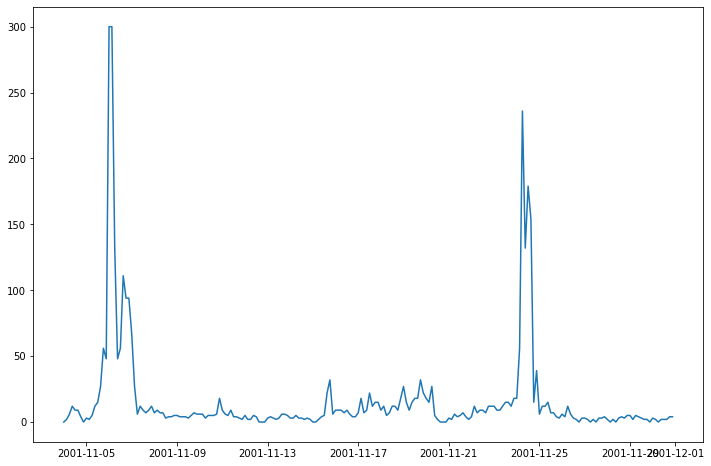

In [22]:
#Creating short time array so I can plot around solar min ( equivalent to date_spv[174824:175096] )
timess = np.arange(datetime(2001,11,4), datetime(2001,12,1), timedelta(hours=3)).astype(datetime)


fig, ax = plt.subplots(figsize=(12, 8))

A = ax.plot(timess, ap_sol_parm_var[154400:154616])

ax.set_xlim()

In [23]:
#===============================================================================================================================
#===============================================================================================================================
#Test file - looking for daily values of f107,f107a,kp,ap rather than 3hourly
#===============================================================================================================================
#===============================================================================================================================


nc_sol_parm_test = 'Nc_Files/arc4/SolarParmsEPP_CMIP6_daily_s18491230_e20150101_c190109.nc'
#nc_sol_parm_test = 'Nc_Files/arc4/SolarForcing2006-2014avg_c180917.nc'

ds_sol_parm_test = xr.open_dataset(nc_sol_parm_test, decode_times=False)

ds_sol_parm_test

<xarray.Dataset>
Dimensions:        (time: 60268, plev: 61, glat: 32, nbd: 2)
Coordinates:
  * glat           (glat) float64 -82.5 -72.94 -70.19 -68.5 ... 70.19 72.94 82.5
  * plev           (plev) float64 5.96e-06 9.827e-06 1.62e-05 ... 794.0 1e+03
  * time           (time) float64 -1.5 -0.5 0.5 ... 6.026e+04 6.027e+04
Dimensions without coordinates: nbd
Data variables:
    ap             (time) float32 ...
    date           (time) int32 ...
    datesec        (time) int32 ...
    epp_ion_rates  (time, plev, glat) float32 ...
    f107           (time) float32 ...
    f107a          (time) float32 ...
    glat_bnds      (glat, nbd) float64 ...
    kp             (time) float32 ...
    scnum          (time) int32 ...
    scph           (time) float32 ...
    ssn            (time) float32 ...
    time_bnds      (time, nbd) float64 ...
Attributes:
    data_title:                \nEPP and geomagnetic parameters for 18491230-...
    data_summary:              \nSSI data are constructed as arithmetic mean ...
    data_reference:            \nMatthes et al. 2016: Solar forcing for CMIP6...
    data_description_url:      \nhttp://solarisheppa.geomar.de/cmip6\nhttp://...
    data_source_files:         \nhttp://solarisheppa.geomar.de/solarisheppa/s...
    creation_date:             \nWed Jan  9 18:01:31 MST 2019
    data_creator:              \nSOLARIS-HEPPA, http://solarisheppa.geomar.de...
    cesm_contact:              \nMike Mills, mmills@ucar.edu
    data_script:               \nCreated by program createSolarDataFileCMIP6_...
    history:                   Wed Jan  9 18:01:22 2019: ncks -O -d time,0,60...
    NCO:                       netCDF Operators version 4.7.4 (http://nco.sf....
    nco_openmp_thread_number:  1

In [24]:
f107_sol_parm_test = ds_sol_parm_test.variables['f107']
f107a_sol_parm_test = ds_sol_parm_test.variables['f107a']
kp_sol_parm_test = ds_sol_parm_test.variables['kp']
ap_sol_parm_test = ds_sol_parm_test.variables['ap']

date_spv_test = ds_sol_parm_test.variables['date']
date_spv_test[0] #18491230
date_spv_test[-1] #20150101



<xarray.Variable ()>
array(20150101, dtype=int32)
Attributes:
    calendar:  gregorian

In [32]:
ind1 = 55458
print(ind1)
print(date_spv_test[ind1])
#2001-11-01
#max
f107_sol_parm_test[ind1] #232
f107a_sol_parm_test[ind1] #215.9605
kp_sol_parm_test[ind1] #3.3875
ap_sol_parm_test[ind1] #24.125


ind2 = 58015
print(ind2)
print(date_spv_test[ind2])

#2008-11-01
#min
f107_sol_parm_test[ind2] #65.6
f107a_sol_parm_test[ind2] #67.487656
kp_sol_parm_test[ind2] #0.625
ap_sol_parm_test[ind2] #2.75

55458
<xarray.Variable ()>
array(20011101, dtype=int32)
Attributes:
    calendar:  gregorian
58015
<xarray.Variable ()>
array(20081101, dtype=int32)
Attributes:
    calendar:  gregorian


<xarray.Variable ()>
array(2.75, dtype=float32)
Attributes:
    long_name:     daily planetary Ap index
    units:         nanoTeslas
    cell_methods:  time: mean

In [39]:
indi1 = 55458 -92
print(indi1)
print(date_spv_test[indi1])
#max


indi2 = 58015 +91
print(indi2)
print(date_spv_test[indi2])
#min


55366
<xarray.Variable ()>
array(20010801, dtype=int32)
Attributes:
    calendar:  gregorian
58106
<xarray.Variable ()>
array(20090131, dtype=int32)
Attributes:
    calendar:  gregorian


(50.0, 280.0)

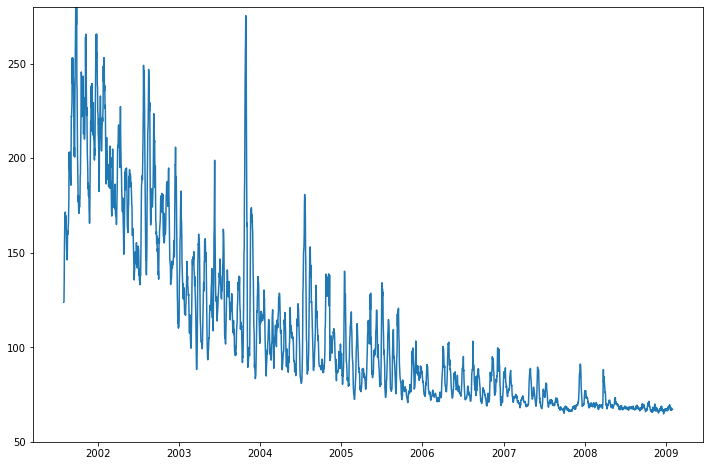

In [47]:
timess = np.arange(datetime(2001,8,1), datetime(2009,1,31), timedelta(days=1)).astype(datetime)

fig, ax = plt.subplots(figsize=(12, 8))

A = ax.plot(timess, f107_sol_parm_test[indi1:indi2])

ax.set_ylim(50,280)

(50.0, 280.0)

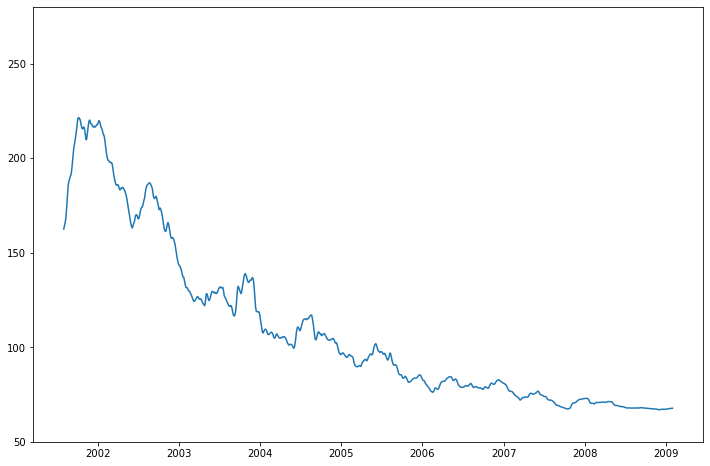

In [50]:
fig, ax = plt.subplots(figsize=(12, 8))

A = ax.plot(timess, f107a_sol_parm_test[indi1:indi2])

ax.set_ylim(50,280)

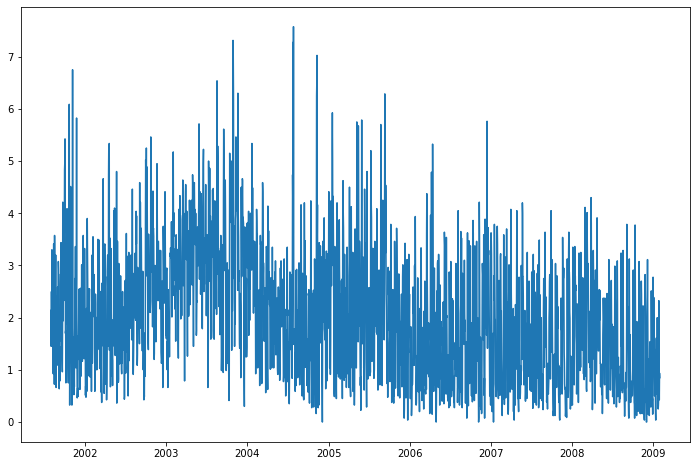

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))

A = ax.plot(timess, kp_sol_parm_test[indi1:indi2])

#ax.set_ylim(50,280)

In [54]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

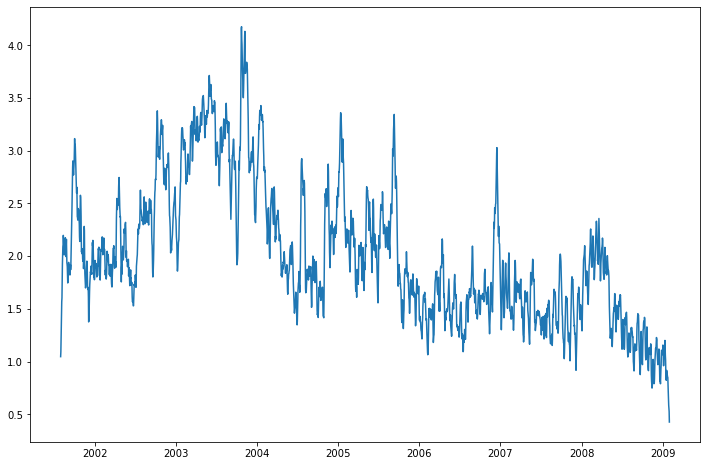

In [61]:
#Plot using a smoothed version

fig, ax = plt.subplots(figsize=(12, 8))

y=kp_sol_parm_test[indi1:indi2]

A = ax.plot(timess, smooth(y,20) )

#ax.set_ylim(50,280)

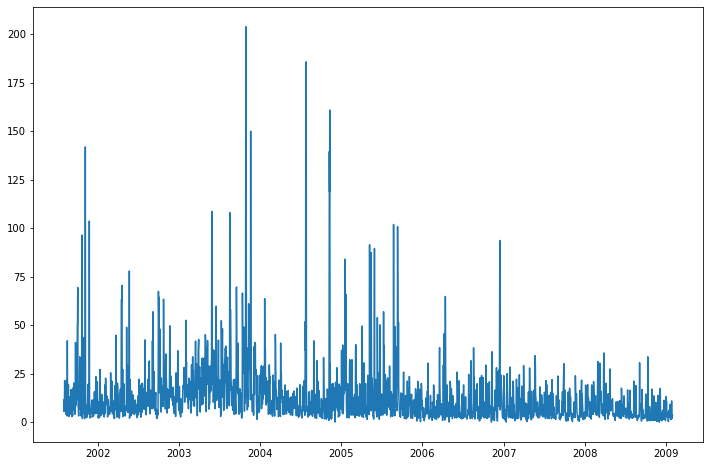

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))

A = ax.plot(timess, ap_sol_parm_test[indi1:indi2])

#ax.set_ylim(50,280)

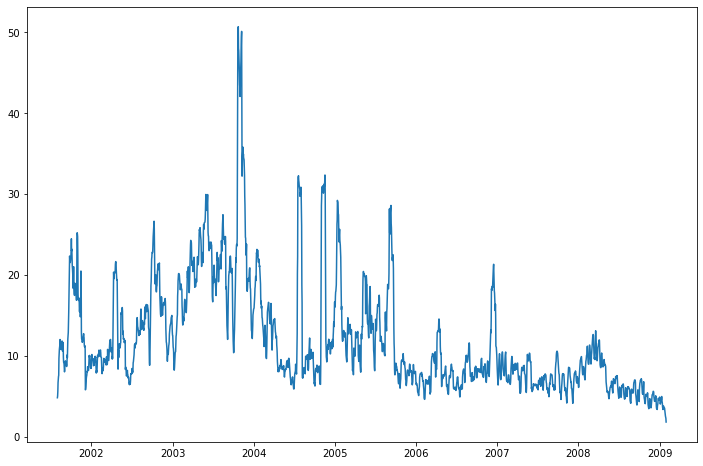

In [62]:
#Plot using a smoothed version

fig, ax = plt.subplots(figsize=(12, 8))

y=ap_sol_parm_test[indi1:indi2]

A = ax.plot(timess, smooth(y,20) )

#ax.set_ylim(50,280)

In [3]:
#===============================================================================================================================
#===============================================================================================================================
#EPP file - checking values
#Solar Proton-caused Ionization rates #/cm^3/s - from NOAA G11
#===============================================================================================================================
#===============================================================================================================================


nc_spes = 'Nc_Files/arc4/spes_1963-2014_c150717.nc'

ds_spes = xr.open_dataset(nc_spes, decode_times=False)

ds_spes

<xarray.Dataset>
Dimensions:   (time: 18994, pressure: 58)
Coordinates:
  * pressure  (pressure) float32 878.7 661.2 497.5 ... 0.0001064 8.009e-05
Dimensions without coordinates: time
Data variables:
    Prod      (time, pressure) float32 ...
    date      (time) int32 ...
    datesec   (time) int32 ...
Attributes:
    original_file:             IonPair_Year-1963.nc
    Title:                     Solar Proton-caused Ionization rates #/cm^3/s ...
    history:                   Fri Jul 17 15:48:59 2015: ncrcat tmp.spe Ion_P...
    nco_openmp_thread_number:  1
    NCO:                       4.3.4

In [5]:
prod = ds_spes.variables['Prod']
date_spes = ds_spes.variables['date']

In [ ]:
date_spes[0] #101
date_spes[1] #19630101
date_spes[2] #19630102
#date_spes[-1] #20141231

<xarray.Variable ()>
array(19630102, dtype=int32)

In [32]:
indic1 = 14185
print(indic1)
print(date_spes[indic1])
#2001-11-01
#max
print(prod[indic1])
"""
array.Variable (pressure: 58)>
array([0.      , 0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.000635, 0.0354  , 0.09458 , 0.1531  ,
       0.2031  , 0.2401  , 0.2616  , 0.2702  , 0.2682  , 0.2523  , 0.2315  ,
       0.2114  , 0.201   , 0.1919  , 0.1819  , 0.1713  , 0.157   , 0.1436  ,
       0.1303  , 0.1157  , 0.1015  , 0.09001 , 0.08747 , 0.09311 , 0.1074  ,
       0.1285  , 0.1499  , 0.1695  , 0.1842  , 0.1942  , 0.1965  , 0.1955  ,
       0.1914  , 0.1825  , 0.17    , 0.1516  , 0.1232  , 0.09496 , 0.07181 ,
       0.05376 , 0.04038 , 0.03016 , 0.02252 , 0.01684 , 0.0125  , 0.009306,
       0.006957, 0.00482 ], dtype=float32)
"""

indic2 = 16742
print(indic2)
print(date_spes[indic2])
#2008-11-01
#min
print(prod[indic2])
"""
<xarray.Variable (pressure: 58)>
array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.172e-04, 4.593e-02,
       1.253e-01, 2.075e-01, 2.817e-01, 3.402e-01, 3.782e-01, 3.978e-01,
       4.013e-01, 3.829e-01, 3.559e-01, 3.281e-01, 3.119e-01, 2.974e-01,
       2.819e-01, 2.658e-01, 2.442e-01, 2.239e-01, 2.037e-01, 1.813e-01,
       1.595e-01, 1.383e-01, 1.184e-01, 1.112e-01, 1.317e-01, 1.986e-01,
       3.224e-01, 5.065e-01, 7.416e-01, 1.024e+00, 1.301e+00, 1.575e+00,
       1.835e+00, 2.029e+00, 2.149e+00, 2.106e+00, 1.771e+00, 1.385e+00,
       1.056e+00, 7.910e-01, 5.946e-01, 4.417e-01, 3.276e-01, 2.432e-01,
       1.785e-01, 1.330e-01, 1.017e-01, 7.062e-02], dtype=float32)
"""

14185
<xarray.Variable ()>
array(20011101, dtype=int32)
<xarray.Variable (pressure: 58)>
array([0.      , 0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.000635, 0.0354  , 0.09458 , 0.1531  ,
       0.2031  , 0.2401  , 0.2616  , 0.2702  , 0.2682  , 0.2523  , 0.2315  ,
       0.2114  , 0.201   , 0.1919  , 0.1819  , 0.1713  , 0.157   , 0.1436  ,
       0.1303  , 0.1157  , 0.1015  , 0.09001 , 0.08747 , 0.09311 , 0.1074  ,
       0.1285  , 0.1499  , 0.1695  , 0.1842  , 0.1942  , 0.1965  , 0.1955  ,
       0.1914  , 0.1825  , 0.17    , 0.1516  , 0.1232  , 0.09496 , 0.07181 ,
       0.05376 , 0.04038 , 0.03016 , 0.02252 , 0.01684 , 0.0125  , 0.009306,
       0.006957, 0.00482 ], dtype=float32)
Attributes:
    long_name:  Ion pair production rate
    units:      /cm3/sec
16742
<xarray.Variable ()>
array(20081101, dtype=int32)
<xarray.Variable (pressure: 58)>
array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000